The code is not working in folder jupyter_notebooks

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import cv2

import sys
sys.path.append(os.path.abspath(".\\"))
from config import paths

# set the variables
raw_file_name = "map"


# read the files names which start 
# from pillows
maps_pillow = [full_file_name for full_file_name in os.listdir(paths.scalled_maps_pillow) if full_file_name.startswith(raw_file_name)]
print(maps_pillow)
# from cv2
maps_cv2 = [full_file_name for full_file_name in os.listdir(paths.scalled_maps_cv2) if full_file_name.startswith(raw_file_name)]
print(maps_cv2) 


['map_bicubic.jpg', 'map_bicubic.png', 'map_bilinear.jpg', 'map_bilinear.png', 'map_lanczos.jpg', 'map_lanczos.png', 'map_nearrest.jpg', 'map_nearrest.png']
['map_interArea.jpg', 'map_interArea.png', 'map_interCubic.jpg', 'map_interCubic.png', 'map_interLinear.jpg', 'map_interLinear.png', 'map_interNearest.jpg', 'map_interNearest.png']


In [8]:
# check the scalled map files info:

def print_scalled_map_size(map_name_list, file_path):
    for i in map_name_list:
        img = Image.open(file_path + f"{i}")
        width, height = img.size
        print(f"{file_path}{i}\t:\t width: {width}, height: {height}")

# from pillows
print("Pillow files: ")
print_scalled_map_size(maps_pillow, paths.scalled_maps_pillow)
# from cv2
print("\nCV2 files: ")
print_scalled_map_size(maps_cv2, paths.scalled_maps_cv2)


Pillow files: 
./files/maps/scalled_maps/pillow/map_bicubic.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_bicubic.png	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_bilinear.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_bilinear.png	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_lanczos.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_lanczos.png	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_nearrest.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/pillow/map_nearrest.png	:	 width: 1050, height: 1050

CV2 files: 
./files/maps/scalled_maps/cv2/map_interArea.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/cv2/map_interArea.png	:	 width: 1050, height: 1050
./files/maps/scalled_maps/cv2/map_interCubic.jpg	:	 width: 1050, height: 1050
./files/maps/scalled_maps/cv2/map_interCubic.png	:	 width: 1050, height: 1050
./files/maps/scalled_maps/cv2/map_

In [9]:
# copy from the cell result above
map_path = "./files/maps/scalled_maps/pillow/map_bicubic.jpg"

### Analisys - histogram

' I CANNOT DISPLAY THE MAP BY METHOD cv2\nimg = cv2.imread(map_path)\ncv2.imshow(f"map {map_path.split("/")[-1]}", img)\n'

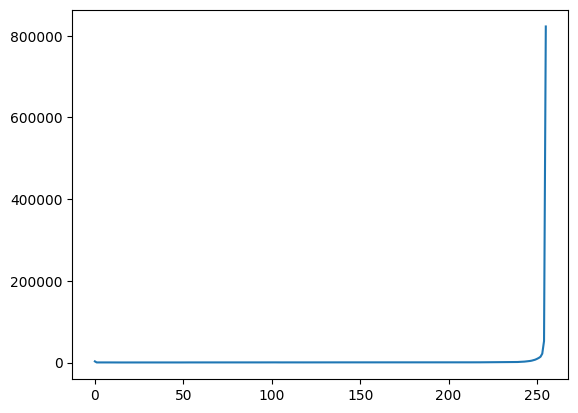

In [10]:
img = Image.open(map_path)
grayscale_image = img.convert('L')
grayscale_image.show()
plt.plot(grayscale_image.histogram())



""" I CANNOT DISPLAY THE MAP BY METHOD cv2
img = cv2.imread(map_path)
cv2.imshow(f"map {map_path.split("/")[-1]}", img)
"""

## SCORES

In [12]:
def map_quality_score(img):
    h, w = img.shape
    total = h*w

    black = np.sum(img < 30)
    white = np.sum(img > 225)
    contrast = img.std()
    sharpness = cv2.Laplacian(img, cv2.CV_64F).var()

    score = (
        0.5 * ((black + white) / total) +
        0.3 * (contrast / 255) +
        0.2 * (sharpness / 1000)
    )
    return score



In [13]:
score_list_pillow = []
score_list_cv2 = []
for i in maps_pillow:
    img = cv2.imread(paths.scalled_maps_pillow + i,  cv2.IMREAD_GRAYSCALE)
    score_list_pillow.append(map_quality_score(img))
    # print(i, map_quality_score(img))
for i in maps_cv2:
    img = cv2.imread(paths.scalled_maps_cv2 + i,  cv2.IMREAD_GRAYSCALE)
    score_list_cv2.append(map_quality_score(img))
    # print(i, map_quality_score(img))

print( "max pillow: ", max(score_list_pillow), "\tfile: ", paths.scalled_maps_pillow+maps_pillow[np.argmax(score_list_pillow)] )
print( "min pillow: ", min(score_list_pillow), "\tfile: ", paths.scalled_maps_pillow+maps_pillow[np.argmin(score_list_pillow)] )
print("max cv2: ", max(score_list_cv2), "\tfile: ", paths.scalled_maps_cv2+maps_cv2[np.argmax(score_list_cv2)])
print("min cv2: ", min(score_list_cv2), "\tfile: ", paths.scalled_maps_cv2+maps_cv2[np.argmin(score_list_cv2)])

# choose the best for pillow nad cv2
the_best_maps = [paths.scalled_maps_pillow+maps_pillow[np.argmax(score_list_pillow)], paths.scalled_maps_cv2+maps_cv2[np.argmax(score_list_cv2)]]
print("\n\n the best maps: ", str(the_best_maps))


max pillow:  1.6211033137524011 	file:  ./files/maps/scalled_maps/pillow/map_nearrest.jpg
min pillow:  0.8535870349356331 	file:  ./files/maps/scalled_maps/pillow/map_bilinear.png
max cv2:  1.6165543684697563 	file:  ./files/maps/scalled_maps/cv2/map_interNearest.jpg
min cv2:  0.8540863679923226 	file:  ./files/maps/scalled_maps/cv2/map_interLinear.png


 the best maps:  ['./files/maps/scalled_maps/pillow/map_nearrest.jpg', './files/maps/scalled_maps/cv2/map_interNearest.jpg']


In [ ]:
## combied map is worst
if the_best_maps[0].split('.')[-1] == the_best_maps[1].split('.')[-1]:
    file_format = the_best_maps[0].split('.')[-1]
else:
    # TODO implement comparing the file
    raise ValueError("different format of imigae files")

img_pillow = cv2.imread(the_best_maps[0],  cv2.IMREAD_GRAYSCALE)
img_cv2 = cv2.imread(the_best_maps[1],  cv2.IMREAD_GRAYSCALE)

combined = ((img_pillow.astype(np.float32) + img_cv2.astype(np.float32)) / 2).astype(np.uint8)
file_name = "file_map"
cv2.imwrite(f"{file_name}.{file_format}", combined)

True

In [12]:
# clening the map
the_best_map = "./files/maps/scalled_maps/pillow/map_nearrest.jpg"
img = cv2.imread(the_best_map, cv2.IMREAD_GRAYSCALE)
white_threshold = 225
img[img > white_threshold] = 255
black_threshold = 30
img[img < black_threshold] = 0

#print(paths.maps_for_processing+the_best_map.split("/")[-1])
cv2.imwrite(paths.maps_for_processing+the_best_map.split("/")[-1], img)


True